$\Large {\textbf{Fórmula Baricéntrica}}$

=> $\normalsize {\textbf {Mínimos cuadrados}}$



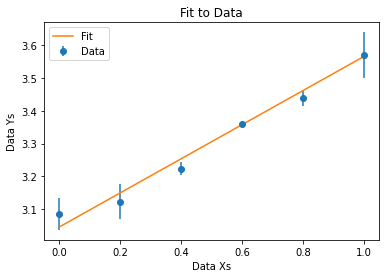

1.0991681955435215


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def helpers(dataxs, datays, datasigs):
    S = np.sum(1/datasigs**2)
    Sx = np.sum(dataxs/datasigs**2)
    Sy = np.sum(datays/datasigs**2)
    Sxx = np.sum(dataxs**2/datasigs**2)
    Sxy = np.sum(dataxs*datays/datasigs**2)
    Del = S*Sxx - Sx**2
    return S, Sx, Sy, Sxx, Sxy, Del

def computecs(dataxs, datays, datasigs):
    S, Sx, Sy, Sxx, Sxy, Del = helpers(dataxs, datays, datasigs)
    cs = np.zeros(2)
    dcs = np.zeros(2)
    cs[0] = (Sxx*Sy - Sx*Sxy)/Del
    cs[1] = (S*Sxy - Sx*Sy)/Del
    dcs[0] = np.sqrt(Sxx/Del)
    dcs[1] = np.sqrt(S/Del)
    return cs, dcs

def computechisq(dataxs, datays, datasigs, cs):
    chisq = np.sum((datays-cs[0]-cs[1]*dataxs)**2/datasigs**2)
    return chisq

dataxs = np.linspace(0, 1, 6)
datays = np.array([3.085, 3.123, 3.224, 3.360, 3.438, 3.569])
datasigs = np.array([0.048, 0.053, 0.02, 0.005, 0.023, 0.07])
cs, dcs = computecs(dataxs, datays, datasigs)

plt.errorbar(dataxs, datays, yerr=datasigs, fmt='o', label='Data')
plt.plot(dataxs, cs[0] + cs[1]*dataxs, label='Fit')
plt.xlabel('Data Xs')
plt.ylabel('Data Ys')
plt.title('Fit to Data')
plt.legend()
plt.show()

chisq = computechisq(dataxs, datays, datasigs, cs)
print(chisq/(dataxs.size - cs.size))


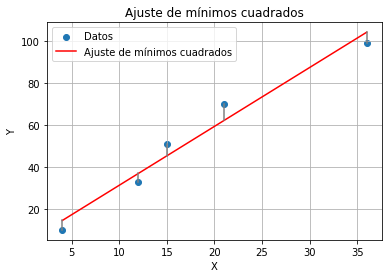

In [14]:
import matplotlib.pyplot as plt

def ajuste_minimos_cuadrados(x, y):
    # Calculando la suma de los valores
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x_i * y_i for x_i, y_i in zip(x, y))
    sum_x_squared = sum(x_i ** 2 for x_i in x)
    
    # Calculando los coeficientes de la línea de ajuste
    n = len(x)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    c = (sum_y - m * sum_x) / n
    
    return m, c

# Ejemplo de datos de entrada
x = [4, 12, 15, 21, 36]
y = [10, 33, 51, 70, 99]

# Realizando el ajuste de mínimos cuadrados
pendiente, intercepto = ajuste_minimos_cuadrados(x, y)

# Calculando las coordenadas de los puntos de la línea de ajuste
x_fit = [min(x), max(x)]
y_fit = [pendiente * x_i + intercepto for x_i in x_fit]

# Graficando los datos y la línea de ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, color='red', label='Ajuste de mínimos cuadrados')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], pendiente * x[i] + intercepto], linestyle='-', color='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de mínimos cuadrados')
plt.legend()
plt.grid(True)
plt.show()



In [72]:
import numpy as np

def chi_squared_test(observed):
    # Calculate expected frequencies
    row_totals = np.sum(observed, axis=1)
    col_totals = np.sum(observed, axis=0)
    total = np.sum(observed)
    expected = np.outer(row_totals, col_totals) / total

    # Calculate Chi-squared statistic
    chi2_stats = np.sum((observed - expected)**2 / expected)

    # Determine degrees of freedom
    df1 = (observed.shape[0] - 1) * (observed.shape[1] - 1)

    # Output resultss
    print("Chi-squared statistic:", chi2_stats)
    print("Degrees of freedom:", df1)
    return chi2_stats, df1

# Example usage
observed = np.array([[10, 20, 30], [6, 9, 17]])
chi_squared_test(observed)

Chi-squared statistic: 0.27157465150403504
Degrees of freedom: 2


NameError: name 'chi2_stats' is not defined

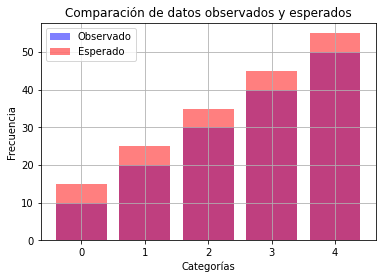

Chi-cuadrado: 4.391053391053391


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la Chi-cuadrado
def chi_squared(observed, expected):
    return np.sum((observed - expected)**2 / expected)

# Datos observados y esperados
observed = np.array([10, 20, 30, 40, 50])
expected = np.array([15, 25, 35, 45, 55])

# Calculando la Chi-cuadrado
chi_sq = chi_squared(observed, expected)

# Graficando los datos observados y esperados
plt.bar(np.arange(len(observed)), observed, color='blue', alpha=0.5, label='Observado')
plt.bar(np.arange(len(expected)), expected, color='red', alpha=0.5, label='Esperado')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Comparación de datos observados y esperados')
plt.legend()
plt.grid(True)
plt.show()

print("Chi-cuadrado:", chi_sq)

In [68]:
import numpy as np
import pandas as pd

np.random.seed(10)
# Sample data randomly at fixed probabilities
type_bottle = np.random.choice(a= ["paper","cans","glass","others","plastic"],p = [0.05, 0.15 ,0.25, 0.05, 0.5],size=1000)
# Sample data randomly at fixed probabilities
month = np.random.choice(a= ["January","February","March"],p = [0.4, 0.2, 0.4],size=1000)

bottles = pd.DataFrame({"types":type_bottle,"months":month})

bottles_tab = pd.crosstab(bottles.types, bottles.months, margins = True)

bottles_tab.columns = ["January","February","March","row_totals"]
 
bottles_tab.index = ["paper","cans","glass","others","plastic","col_totals"]
 
observed = bottles_tab.iloc[0:5,0:3]   # Get table without totals for later use
bottles_tab
print('Observed values')
observed

Observed values


,January,February,March
paper,25,65,64
cans,50,107,94
glass,8,15,15
others,7,21,32
plastic,96,189,212


In [69]:
expected =  np.outer(bottles_tab["row_totals"][0:5],bottles_tab.loc["col_totals"][0:3]) / 1000
 
expected = pd.DataFrame(expected)
 
expected.columns = ["Janurary","Feburary","March"]
expected.index = ["paper","cans","glass","others","plastic"]
print('Expected values')
expected

Expected values


,Janurary,Feburary,March
paper,28.644,61.138,64.218
cans,46.686,99.647,104.667
glass,7.068,15.086,15.846
others,11.160,23.820,25.020
plastic,92.442,197.309,207.249


In [70]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

3.1891910015593856


In [73]:
from scipy.stats import chi2

# Encontrar el valor crítico para el 95% de confianza con 8 grados de libertad
critical_value = chi2.ppf(q=0.95, df=8)
print("Valor crítico:", critical_value)

# Encontrar el valor p
p_value = 1 - chi2.cdf(x=0.27157465150403504, df=2)
print("Valor p:", p_value)


Valor crítico: 15.50731305586545
Valor p: 0.873028283380073
